Link source : 
1. https://github.com/tesseract-ocr/tesseract
2. https://tesseract-ocr.github.io/tessdoc/Installation.html

In [10]:
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [2]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [4]:
!tesseract logo.png stdout -l eng --psm 11

Estimating resolution as 288
= baal,

Cele One DWerep

& Y@© PHILIPS Cc

vodafone

6

OP in ED (@D © > hex ©

@ sony PayPal 2) BE Microsoft @ Bosch GMEQ

Oeees ebay } Kenwood sell NG maoaven

Canon & wi [) Mobili

(SUEKERS] BOSS ORACLE GI

nVIDIA

a. El Em € GW ED YY ache e008

Oom © @ ua Gaon S a w @


In [5]:
!tesseract logo.png stdout -l eng --psm 6

ae, D <P lids TED (ote © GW Fedex
@ sony PayPal 2) BE Microsoft @ BoscH
Ovces ebay } KENWOOD yeti IN GS mame
Canon & Gs [) Mobili BOSS ORACLE GQ
a. El Em € GW ED YY ache e008
Oom © @ ua Gaon S a w @


In [6]:
!tesseract --help-oem

OCR Engine modes: (see https://tesseract-ocr.github.io/tessdoc/#40-with-lstm)
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.


In [7]:
!tesseract logo.png stdout -l eng --psm 6 --oem 3

ae, D <P lids TED (ote © GW Fedex
@ sony PayPal 2) BE Microsoft @ BoscH
Ovces ebay } KENWOOD yeti IN GS mame
Canon & Gs [) Mobili BOSS ORACLE GQ
a. El Em € GW ED YY ache e008
Oom © @ ua Gaon S a w @


In [8]:
!tesseract instruction.png result.txt

Estimating resolution as 231


In [9]:
import pytesseract
import PIL.Image
import cv2

In [3]:
myconfig = r"--psm 6 --oem 3"

text = pytesseract.image_to_string(PIL.Image.open("instruction.png"), config=myconfig)
print (text)


Instructions
On the following page is some text. To show the
text, click the mouse then begin to read as soon
as the text appears. After one minute a chime
will sound. Stop reading and note the number of
the line that you are on (located on the right).
That is your reading rate. Go to the next page
and answer some questions about what you
have read (without going back). Afterwards, go
to the final page for comments and tips about
reading.



In [5]:
myconfig = r"--psm 11 --oem 3"

text = pytesseract.image_to_string(PIL.Image.open("sign.png"), config=myconfig)
print(text)


a

A

<



In [6]:
img = cv2.imread("instruction.png")
height, width, _ = img.shape


In [ ]:
boxes = pytesseract.image_to_boxes(img, config=myconfig)
print (boxes)


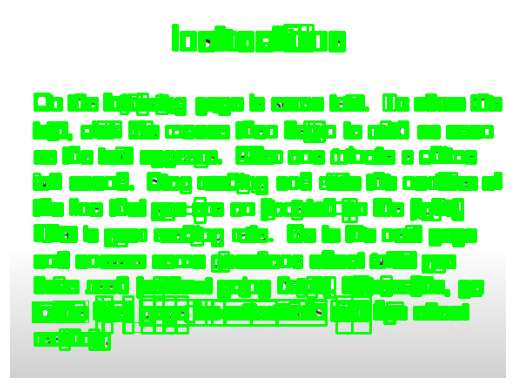

In [14]:
import matplotlib.pyplot as plt

boxes = pytesseract.image_to_boxes(img, config=myconfig)
for box in boxes.splitlines():
    box = box.split(" ")
    img = cv2.rectangle(img, (int(box[1]), height - int(box[2])), (int(box[3]), height - int(box[4])), (0, 255, 0), 1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [18]:
from pytesseract import Output

data = pytesseract.image_to_data(img, output_type=Output.DICT, config=myconfig)
print(data.keys())
print(data['text'])

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
['', '', '', '', '7', '', '', '', '=', '', '', '', ':', '', '', '', 'a', '', '', '', '.', '', '', '', '.', '', '', '', '-', '', '', '', '—', '', '', '', 'a=', 'm', '', '', '', '=e', '', '', '', '———', '', '', '', 'co', '', '', '', 'all', '', '', '', '—', '', '', '', 'oo', '', '', '', 'LI)', '', '', '', 'uo']


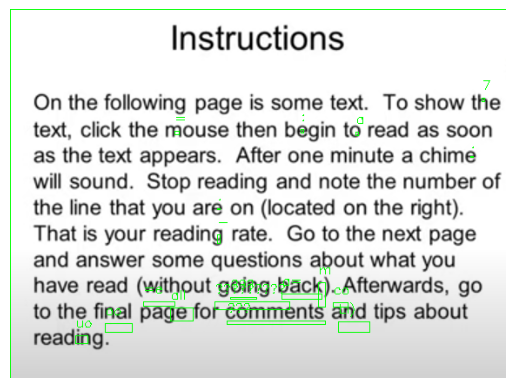

In [43]:
amount_boxes = len(data['text'])
img = cv2.imread("instruction.png")
myconfig = r"--psm 11 --oem 3"
# myconfig = r"--psm 11 --oem 3"
boxes = pytesseract.image_to_boxes(img, config=myconfig)

for i in range(amount_boxes):
    # if len(data['conf']) > 80:
    (x, y, width, height) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    img = cv2.rectangle(img, (x, y), (x + width, y + height), (0, 255, 0), 1)
    img = cv2.putText(img, data['text'][i], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
